In [1]:
# Comparison of the responses used in sswidl 
# From the older CHIANTI v7 used in 
# https://hesperia.gsfc.nasa.gov/ssw/gen/idl/synoptic/goes/goes_chianti_tem.pro
# And the newer CHIANTI v9 (or v10) used in 
# https://hesperia.gsfc.nasa.gov/ssw/gen/idl/atest/goes_chianti_tem.pro
# 
# 25-10-2021  IGH

In [2]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import goesxrs_temp as gtem

In [3]:
# Load in my version of older CHv7 coronal response for GOES15
resp15_v7, resptmk15_v7 = gtem.get_resps_old()

In [4]:
# Load in the newer ones from the fits files created by
# https://hesperia.gsfc.nasa.gov/ssw/gen/idl/synoptic/goes/buildresponse/goes_chianti_response.pro
# version calculated in Jul-2020 for CHv9 and in
# https://hesperia.gsfc.nasa.gov/ssw/gen/idl/atest/goes_chianti_resp_20200812.fits

rfile='goes_chianti_resp_20200812.fits'
hdulist = fits.open(rfile)
respdat=hdulist[1].data
resphdr = hdulist[1].header
print(hdulist[1].columns.names)
hdulist.close()


['DATE', 'VERSION', 'METHOD', 'SAT', 'SECONDARY', 'ALOG10EM', 'TEMP_COEF', 'TEMP_MK', 'FLONG_PHO', 'FSHORT_PHO', 'FLONG_COR', 'FSHORT_COR']


In [5]:
sat=15

resptmk15_v9=respdat["TEMP_MK"][sat-1]
resp15_v9=np.empty((101,2))
resp15_v9[:,0]=respdat["FLONG_COR"][sat-1]
resp15_v9[:,1]=respdat["FSHORT_COR"][sat-1]

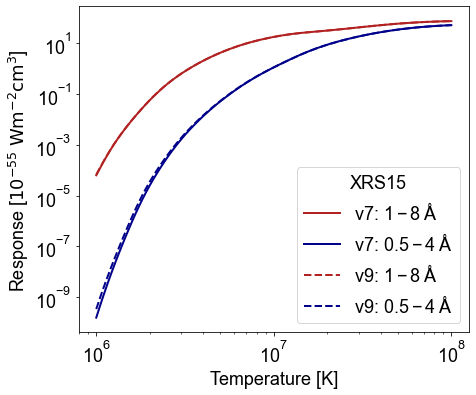

In [6]:
# Plot it to see what it is like:
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})
fig,ax = plt.subplots(figsize=(7, 6))
plt.plot(1e6*resptmk15_v7,resp15_v7[:,0],marker=None,color='firebrick',lw=2,label='v7: $1-8\;\AA$')
plt.plot(1e6*resptmk15_v7,resp15_v7[:,1],marker=None,color='darkblue',lw=2,label='v7: $0.5-4\;\AA$')
plt.plot(1e6*resptmk15_v9,resp15_v9[:,0],marker=None,color='firebrick',lw=2,ls='--',label='v9: $1-8\;\AA$')
plt.plot(1e6*resptmk15_v9,resp15_v9[:,1],marker=None,color='darkblue',lw=2,ls='--',label='v9: $0.5-4\;\AA$')
ax.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax.set_xlabel("Temperature [K]")
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend(title='XRS15')
plt.show()